# Diabetes Prediction

In [6]:
import pandas as pd
import seaborn 


# https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicat
# dataset ^^^
data = pd.read_csv("diabetes_012.csv", header=0)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,...,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703
1.0,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631,...,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631
2.0,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346,...,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346


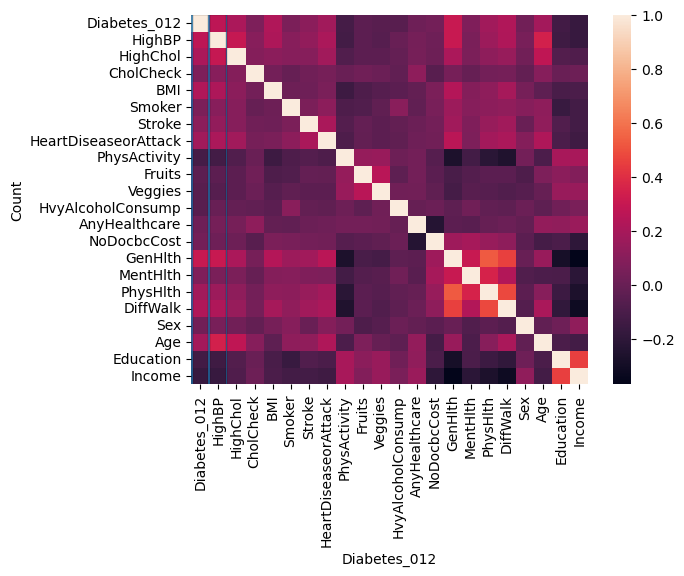

In [7]:
#filtered out prediabetes
#diabetes= data.query('Diabetes_012 == 0 or Diabetes_012 ==2')
seaborn.heatmap(data.corr(numeric_only=True))
seaborn.histplot(data=data, x= data.Diabetes_012)

data.groupby(['Diabetes_012']).count()

<Axes: xlabel='Diabetes_012', ylabel='Count'>

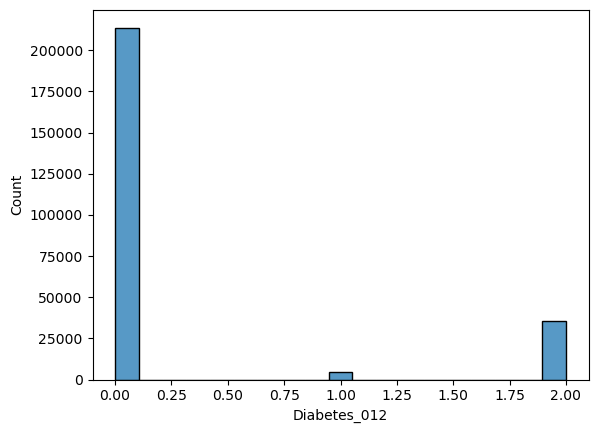

In [8]:
seaborn.histplot(data=data, x= data.Diabetes_012)


13.9% of the respondents in the survey have diabetes, 1.8% have prediabetes, and 84.2% do not have diabetes. Our benchmark for accuracy will be 84.2% since a naive model of predicting no one has diabetes will be at that accuracy. 

In [9]:
data['PhysHlth'].corr(data['GenHlth'])  #.52
data['PhysHlth'].corr(data['DiffWalk']) #.478
data['Education'].corr(data['Income']) #.448
data['DiffWalk'].corr(data['GenHlth']) #.456

0.45691950252819163

## Correlation of variables
    The variable listed above have the highest correlation with each other. The variance inflation factor will need to be checked when implementing the logistic regression model. For the rest of the models this correlation should be fine. 

<Axes: xlabel='BMI', ylabel='Count'>

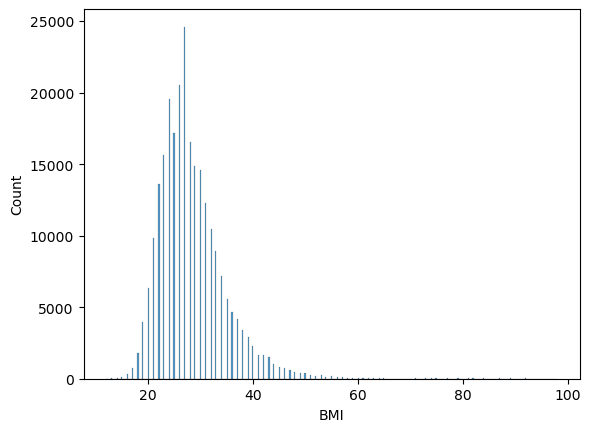

In [10]:
seaborn.histplot(data['BMI'])

In linear regression this skewness would need to be transformed but for classfication this technique is unnecessary. 

In [11]:
# change mentHlth and physHlth to 3 categories (1-5, 5-14, 14+)

# Custom binning
bins = [-1, 5, 14, 32]
labels = [0, 1, 2]
data['MentBin'] = pd.cut(data['MentHlth'], bins=bins, labels=labels)
labels = [0, 1, 2]
data['PhysBin'] = pd.cut(data['PhysHlth'], bins=bins, labels=labels)
data = data.drop(['MentHlth', 'PhysHlth'], axis=1)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentBin,PhysBin
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,2,2
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,2,2
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,0,0


In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.3, random_state=1)

y_train = train['Diabetes_012']
y_test = test['Diabetes_012']

x_train = train.loc[:, train.columns != 'Diabetes_012']
x_test = test.loc[:, test.columns != 'Diabetes_012']



In [13]:
Evaluation = pd.DataFrame({
    "Model":[],
    "Accuracy":[] 
})

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = x_train
X = X.drop('Education', axis=1)
X = X.drop('AnyHealthcare', axis=1)
X = X.drop('CholCheck', axis=1)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                 Feature        VIF
0                 HighBP   2.283946
1               HighChol   2.032014
2                    BMI  14.732007
3                 Smoker   1.929890
4                 Stroke   1.125795
5   HeartDiseaseorAttack   1.286589
6           PhysActivity   4.357376
7                 Fruits   3.002657
8                Veggies   5.660521
9      HvyAlcoholConsump   1.082561
10           NoDocbcCost   1.183961
11               GenHlth  10.065431
12              DiffWalk   1.826532
13                   Sex   1.908590
14                   Age   8.598666
15                Income   9.576628
16               MentBin   1.392750
17               PhysBin   1.893051


In [15]:
# dropped because of high p-value where p > .10
X = X.drop('Fruits', axis=1)
X = X.drop('MentBin', axis=1)
X = X.drop('DiffWalk', axis=1)
X = X.drop('NoDocbcCost', axis=1)
X = X.drop('HeartDiseaseorAttack', axis=1)
X = X.drop('PhysActivity', axis=1)
X = X.drop('Smoker', axis=1)
X = X.drop('Sex', axis=1)
X = X.drop('Veggies', axis=1)
X = X.drop('Stroke', axis=1)

In [16]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.MNLogit(y_train, X)
log_results = model.fit()

print(log_results.summary())


Optimization terminated successfully.
         Current function value: 0.404055
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:           Diabetes_012   No. Observations:               177576
Model:                        MNLogit   Df Residuals:                   177558
Method:                           MLE   Df Model:                           16
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.1797
Time:                        20:25:27   Log-Likelihood:                -71751.
converged:                       True   LL-Null:                       -87466.
Covariance Type:            nonrobust   LLR p-value:                     0.000
   Diabetes_012=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.0415      0.132    -53.191      0.000      -7.301      -6.782
HighBP  

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_test = x_test
X_test = X_test.drop( ['Education','AnyHealthcare','CholCheck',
                      'Fruits','MentBin','DiffWalk',
                      'NoDocbcCost','HeartDiseaseorAttack','PhysActivity',
                      'Smoker','Sex','Veggies','Stroke'], axis=1)


X_test = sm.add_constant(X_test)

pred_prob = log_results.predict(X_test)


pred_class = pred_prob.idxmax(axis=1)
accuracy_log = accuracy_score(y_test, pred_class)
conf_matrix_log = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, pred_class))

Evaluation = Evaluation._append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_log
}, ignore_index= True)

Confusion Matrix:
 [[62652     0  1452]
 [ 1242     0   106]
 [ 8935     0  1717]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64104
         1.0       0.00      0.00      0.00      1348
         2.0       0.52      0.16      0.25     10652

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104



c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
#decision trees
from sklearn.tree import DecisionTreeClassifier
gini_tree = DecisionTreeClassifier(random_state=1, criterion="gini", class_weight='balanced')
gini_tree.fit(x_train, y_train)
gini_pred = gini_tree.predict(x_test)

accuracy = accuracy_score(y_test, pred_class)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, pred_class))

Evaluation = Evaluation._append({
    "Model": "Decision Tree GINI",
    "Accuracy": accuracy
    
}, ignore_index= True)

Accuracy: 0.8458
Confusion Matrix:
 [[62652     0  1452]
 [ 1242     0   106]
 [ 8935     0  1717]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64104
         1.0       0.00      0.00      0.00      1348
         2.0       0.52      0.16      0.25     10652

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104



c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gradb_clf = GradientBoostingClassifier( 
    n_estimators=25,    
    learning_rate=0.01,   
    max_depth=4,         
    random_state=1
    )


gradb_clf.fit(x_train, y_train)
gradb_pred = gradb_clf.predict(x_test)

accuracy = accuracy_score(y_test, gradb_pred)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, pred_class))

Evaluation = Evaluation._append({
    "Model": "Gradient Boosting",
    "Accuracy": accuracy
}, ignore_index= True)

Accuracy: 0.8423
Confusion Matrix:
 [[62652     0  1452]
 [ 1242     0   106]
 [ 8935     0  1717]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64104
         1.0       0.00      0.00      0.00      1348
         2.0       0.52      0.16      0.25     10652

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104



c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(
    n_estimators=50,      
    max_samples=0.6,      
    max_features=0.7,     
    random_state=1
)

bagging_clf.fit(x_train, y_train)
y_pred = bagging_clf.predict(x_test)

accuracy =accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
conf_matrix_log = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, pred_class))

Evaluation = Evaluation._append({
    "Model": "Bagging",
    "Accuracy": accuracy
    
}, ignore_index= True)

Accuracy: 0.8459870703248187
Confusion Matrix:
 [[62652     0  1452]
 [ 1242     0   106]
 [ 8935     0  1717]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64104
         1.0       0.00      0.00      0.00      1348
         2.0       0.52      0.16      0.25     10652

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104



c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


from tensorflow.keras.utils import to_categorical

# One-hot encode the target variable
y = to_categorical(y_train)        
y_test_encoded = to_categorical(y_test)  


scaler = StandardScaler()
x = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


model = Sequential([
    Dense(64, activation='relu', input_shape=(x.shape[1],)),
    Dropout(0.1),  
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x, y, epochs=50, batch_size=100, validation_split=0.2)

y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)
conf_matrix_log = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, pred_class))


Evaluation = Evaluation._append({
    "Model": "DNN",
    "Accuracy": accuracy,
}, ignore_index= True)


print(f"Test Set Accuracy: {accuracy:.4f}")


c:\Users\corkr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8432 - loss: 0.4338 - val_accuracy: 0.8458 - val_loss: 0.4012
Epoch 2/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8485 - loss: 0.3976 - val_accuracy: 0.8458 - val_loss: 0.4000
Epoch 3/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8491 - loss: 0.3963 - val_accuracy: 0.8472 - val_loss: 0.3990
Epoch 4/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8499 - loss: 0.3954 - val_accuracy: 0.8476 - val_loss: 0.3996
Epoch 5/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8508 - loss: 0.3925 - val_accuracy: 0.8472 - val_loss: 0.3979
Epoch 6/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8496 - loss: 0.3926 - val_accuracy: 0.8464 - val_loss: 0.3993
Epoch 7/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8494 - loss: 0.3929 - val_accuracy: 0.8480 - val_loss: 0.3975
Epoch 8/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8504 - loss: 0.3912 - 

c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
Evaluation

,Model,Accuracy
0,Logistic Regression,0.845803
1,Decision Tree GINI,0.845803
2,Gradient Boosting,0.842321
3,Bagging,0.845987
4,DNN,0.849180


The benchmark was 84.2%, which all models surpassed, albeit by a small margin. Accuracy could be significantly improved by applying domain knowledge to enhance feature engineering or revising the survey to extract more relevant information.

In [26]:
#import tensorflowjs as tfjs
#tfjs.converters.save_keras_model(model, "model_web")
#model.save("saved_model/my_model")
model.save("my_model.h5")